In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
plt.style.use('fivethirtyeight')

%matplotlib inline

pd.set_option('display.expand_frame_repr', False)
plt.rcParams['figure.figsize'] = (20, 10)

In [106]:
data = pd.read_excel('nasdaq.xlsx')
data.tail(25)

,Date,Open,High,Low,Close,Adj Close,Volume
1239,2020-10-30,11103.469727,11129.809570,10822.570313,10911.589844,10911.589844,3.662840e+09
1240,2020-11-02,11010.450195,11071.080078,10830.950195,10957.610352,10957.610352,3.196720e+09
1241,2020-11-03,11038.660156,11213.919922,11004.839844,11160.570313,11160.570313,3.190710e+09
1242,2020-11-04,11443.769531,11663.309570,11394.209961,11590.780273,11590.780273,3.606820e+09
1243,2020-11-05,11816.330078,11924.280273,11784.150391,11890.929688,11890.929688,3.823380e+09
1244,2020-11-06,11869.900391,11920.540039,11737.129883,11895.230469,11895.230469,4.156030e+09
1245,2020-11-09,12046.660156,12108.070313,11703.490234,11713.780273,11713.780273,5.823620e+09
1246,2020-11-10,11622.440430,11665.870117,11424.610352,11553.860352,11553.860352,4.712950e+09
1247,2020-11-11,11656.650391,11793.570313,11638.900391,11786.429688,11786.429688,3.823270e+09
1248,2020-11-12,11802.500000,11847.839844,11666.370117,11709.589844,11709.589844,3.862690e+09


In [107]:
data = data.iloc[:, [0, 4]]
data.columns = ['Date', 'Close']
data

,Date,Close
0,2015-11-30,5108.669922
1,2015-12-01,5156.310059
2,2015-12-02,5123.220215
3,2015-12-03,5037.529785
4,2015-12-04,5142.270020
...,...,...
1259,2020-12-14,NaN
1260,2020-12-15,NaN
1261,2020-12-16,NaN
1262,2020-12-17,NaN


In [108]:
data = data.set_index(data['Date'])
del data['Date']
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1264 entries, 2015-11-30 to 2020-12-18
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1259 non-null   float64
dtypes: float64(1)
memory usage: 19.8 KB


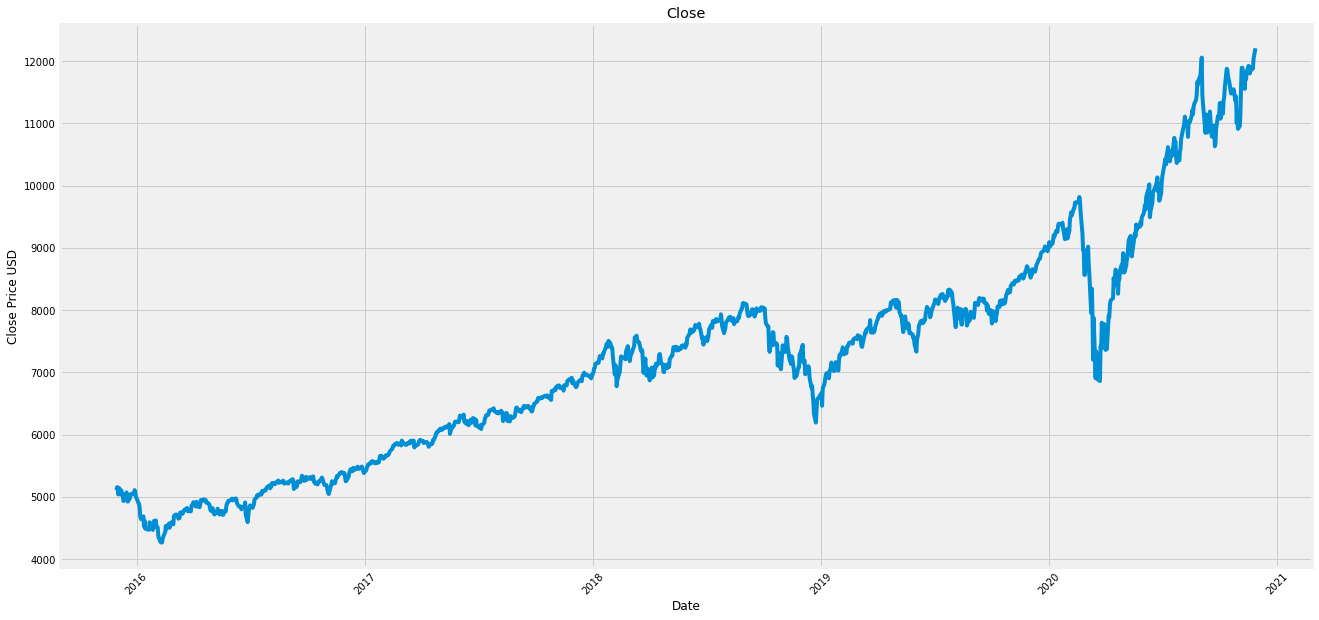

In [109]:
plt.title("Close")
plt.plot(data['Close'])
plt.xlabel("Date")
plt.xticks(rotation = 45)
plt.ylabel("Close Price USD")
plt.show()

In [110]:
close_data = data.filter(['Close'])
dataset = close_data.values # convert numpy.array
training_data_len = math.ceil(len(dataset)*.8)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []

for i in range(28, len(train_data)):
    x_train.append(train_data[i-28:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


test_data = scaled_data[training_data_len - 28 : , :]
x_test = []
y_test = dataset[training_data_len :, :]

for i in range(28, len(test_data)) :
    x_test.append(test_data[i-28:i, 0])
    
x_test = np.array(x_test)
x_test.shape

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [111]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [112]:
model.compile(optimizer = 'adam', loss='mean_squared_error')

In [113]:
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
984/984 [==============================] - 5s 6ms/step - loss: 0.0011
Epoch 2/10
984/984 [==============================] - 6s 6ms/step - loss: 4.2391e-04
Epoch 3/10
984/984 [==============================] - 6s 6ms/step - loss: 3.1091e-04
Epoch 4/10
984/984 [==============================] - 6s 6ms/step - loss: 2.7851e-04
Epoch 5/10
984/984 [==============================] - 6s 6ms/step - loss: 2.2156e-04
Epoch 6/10
984/984 [==============================] - 6s 6ms/step - loss: 1.9865e-04
Epoch 7/10
984/984 [==============================] - 6s 6ms/step - loss: 2.4657e-04
Epoch 8/10
984/984 [==============================] - 6s 6ms/step - loss: 1.7665e-04
Epoch 9/10
984/984 [==============================] - 6s 6ms/step - loss: 1.7262e-04
Epoch 10/10
984/984 [==============================] - 6s 6ms/step - loss: 1.6472e-04


In [114]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [115]:
rmse = np.sqrt(np.mean(((predictions-y_test)**2)))
rmse

nan

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


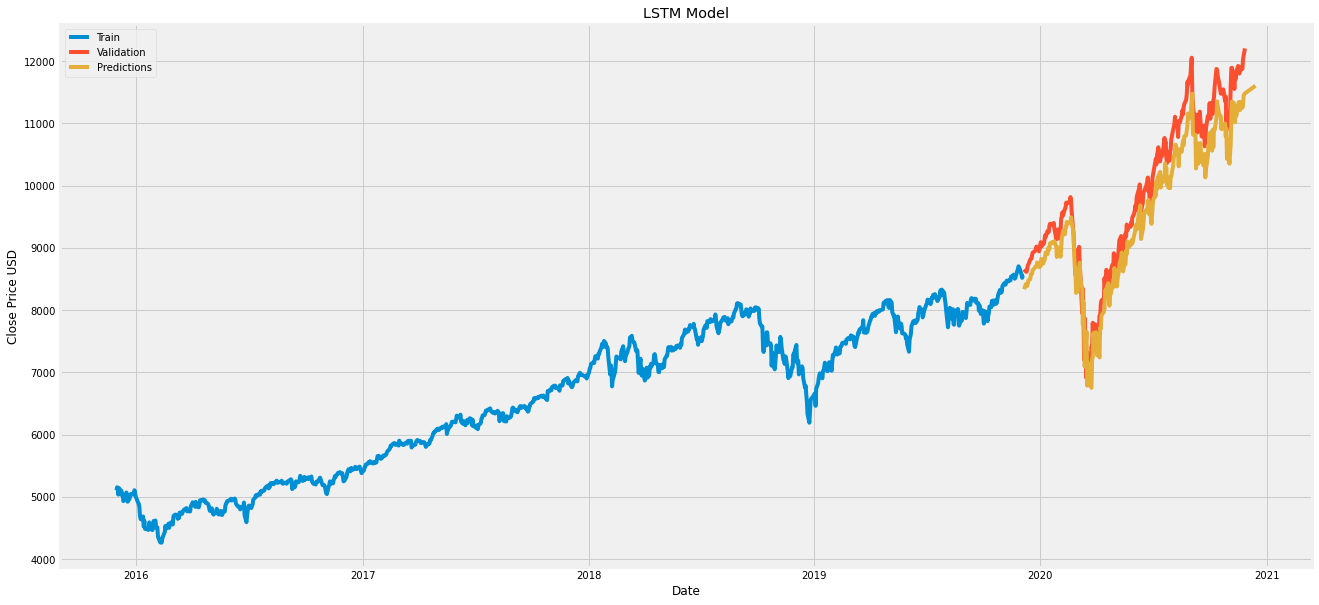

In [116]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD')
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Validation', 'Predictions'], loc = 'upper left')
plt.show()

In [117]:
valid

,Close,Predictions
Date,,
2019-12-06,8656.530273,8337.208008
2019-12-09,8621.830078,8421.087891
2019-12-10,8616.179688,8386.537109
2019-12-11,8654.049805,8388.647461
2019-12-12,8717.320313,8422.410156
...,...,...
2020-12-14,NaN,11605.603516
2020-12-15,NaN,NaN
2020-12-16,NaN,NaN


In [92]:
valid['Close'].iloc[-5] = valid['Predictions'].iloc[-5]
dataset = valid.values # convert numpy.array
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

C:\Users\User\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


202